In [243]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [244]:
pd.set_option('display.max_columns', None)

In [245]:
df = pd.read_csv('sales_data.csv')

In [246]:
df.head()

,Order No,Order Date,Customer Name,Address,City,State,Customer Type,Account Manager,Order Priority,Product Name,Product Category,Product Container,Ship Mode,Ship Date,Cost Price,Retail Price,Profit Margin,Order Quantity,Sub Total,Discount %,Discount $,Order Total,Shipping Cost,Total
0,4293-1,02-09-2014,Vivek Sundaresam,"152 Bunnerong Road,Eastgardens",Sydney,NSW,Small Business,Tina Carlton,Critical,UGen Ultra Professional Cordless Optical Suite,Office Supplies,Small Box,Regular Air,04-09-2014,$156.50,$300.97,$144.47,23.0,"$4,533.52",2%,$194.83,"$4,757.22",$7.18,"$4,291.55"
1,5001-1,24-10-2015,Shahid Hopkins,"438 Victoria Avenue,Chatswood",Sydney,NSW,Corporate,Natasha Song,Medium,Bagged Rubber Bands,Office Supplies,Small Pack,Regular Air,26-10-2015,$0.24,$1.26,$1.02,8.0,$45.20,3%,$0.00,$45.90,$0.70,$46.91
2,5004-1,13-03-2014,Dennis Pardue,"412 Brunswick St,Fitzroy",Melbourne,VIC,Consumer,Connor Betts,Not Specified,TechSavi Cordless Navigator Duo,Office Supplies,Small Box,Regular Air,13-03-2014,$42.11,$80.98,$38.87,45.0,$873.32,4%,$72.23,$837.57,$7.18,$82.58
3,5009-1,18-02-2013,Sean Wendt,"145 Ramsay St,Haberfield",Sydney,NSW,Small Business,Phoebe Gour,Critical,Artisan Printable Repositionable Plastic Tabs,Office Supplies,Wrap Bag,Regular Air,20-02-2013,$5.33,$8.60,$3.27,16.0,$73.52,1%,$4.35,$740.67,$6.19,$730.92
4,5010-1,13-09-2014,Christina Vanderzanden,"188 Pitt Street,Sydney",Sydney,NSW,Small Business,Tina Carlton,Not Specified,Pizazz Drawing Pencil Set,Office Supplies,Wrap Bag,Express Air,17-09-2014,$1.53,$2.78,$1.25,49.0,$138.46,7%,$5.95,$123.77,$1.34,$125.97


In [247]:
df.shape

(5000, 24)

# DATA WRANGLING

### Handling missing values

In [248]:
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0]

In [249]:
missing_data

Address           1
Order Quantity    1
dtype: int64

* since there is only 1 missing value in each column, best option would be to drop the row

In [250]:
df[df['Address'].isnull()]

,Order No,Order Date,Customer Name,Address,City,State,Customer Type,Account Manager,Order Priority,Product Name,Product Category,Product Container,Ship Mode,Ship Date,Cost Price,Retail Price,Profit Margin,Order Quantity,Sub Total,Discount %,Discount $,Order Total,Shipping Cost,Total
4354,6384-1,27-04-2016,Patt Bawkins,NaN,Sydney,NSW,Small Business,Tina Carlton,High,HFX LaserJet 3310 Copier,Office Supplies,Small Box,Regular Air,29-04-2016,$377.99,$599.99,$222.00,47.0,"$9,599.84",0%,$0.00,"$9,599.84",$24.49,"$9,624.33"


In [251]:
df.dropna(subset=['Address'], axis=0, inplace=True)

In [252]:
df[df['Order Quantity'].isnull()]

,Order No,Order Date,Customer Name,Address,City,State,Customer Type,Account Manager,Order Priority,Product Name,Product Category,Product Container,Ship Mode,Ship Date,Cost Price,Retail Price,Profit Margin,Order Quantity,Sub Total,Discount %,Discount $,Order Total,Shipping Cost,Total
1411,5428-1,25-02-2014,Jhrip Luxen,"4A Lyons St,Strathfield",Sydney,NSW,Home Office,Tina Carlton,High,Creator Colored Pencils,Furniture,Large Box,Regular Air,26-02-2014,$1.57,$3.28,$1.71,NaN,$85.28,4%,$6.82,$78.46,$0.98,$79.44


In [253]:
df.dropna(subset=['Order Quantity'], axis=0,inplace=True)

### Data Formatting

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4998 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Order No           4998 non-null   object 
 1   Order Date         4998 non-null   object 
 2   Customer Name      4998 non-null   object 
 3   Address            4998 non-null   object 
 4   City               4998 non-null   object 
 5   State              4998 non-null   object 
 6   Customer Type      4998 non-null   object 
 7   Account Manager    4998 non-null   object 
 8   Order Priority     4998 non-null   object 
 9   Product Name       4998 non-null   object 
 10  Product Category   4998 non-null   object 
 11  Product Container  4998 non-null   object 
 12  Ship Mode          4998 non-null   object 
 13  Ship Date          4998 non-null   object 
 14  Cost Price         4998 non-null   object 
 15  Retail Price       4998 non-null   object 
 16  Profit Margin      4998 non-n

In [255]:
df['Cost Price'] = df['Cost Price'].str.lstrip("$")
df['Cost Price'] = df['Cost Price'].astype('float')

In [256]:
df['Retail Price'] = df['Retail Price'].str.lstrip("$")
df['Retail Price'] = df['Retail Price'].astype('float')

In [257]:
df['Profit Margin'] = df['Profit Margin'].str.lstrip("$")
df['Profit Margin'] = df['Profit Margin'].astype('float')

In [258]:
df['Sub Total'] = df['Sub Total'].str.lstrip("$")
df['Sub Total'] = df['Sub Total'].str.replace(',','')
df['Sub Total'] = df['Sub Total'].astype('float')

In [259]:
df['Discount $'] = df['Discount $'].str.lstrip("$")
df['Discount $'] = df['Discount $'].str.replace(',','')
df['Discount $'] = df['Discount $'].astype('float')

In [260]:
df['Order Total'] = df['Order Total'].str.lstrip("$")
df['Order Total'] = df['Order Total'].str.replace(',','')
df['Order Total'] = df['Order Total'].astype('float')

In [261]:
df['Shipping Cost'] = df['Shipping Cost'].str.lstrip("$")
df['Shipping Cost'] = df['Shipping Cost'].astype('float')

In [262]:
df['Total'] = df['Total'].str.lstrip("$")
df['Total'] = df['Total'].str.replace(',','')
df['Total'] = df['Total'].astype('float')

In [263]:
df['Discount %'] = df['Discount %'].str.rstrip('%')
df['Discount %'] = df['Discount %'].astype('int')

In [264]:
df['Order No'] = df['Order No'].str.replace('-','')
df['Order No'] = df['Order No'].astype('int')

In [265]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format="%d-%m-%Y")
df['Order Date'] = df['Order Date'].dt.strftime('%d-%m-%Y')
df['Order Date'] = df['Order Date'].astype('datetime64[ns]')

In [266]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format="%d-%m-%Y")
df['Ship Date'] = df['Ship Date'].dt.strftime("%d-%m-%Y")
df['Ship Date'] = df['Ship Date'].astype('datetime64[ns]')

In [267]:
df.dtypes

Order No                      int64
Order Date           datetime64[ns]
Customer Name                object
Address                      object
City                         object
State                        object
Customer Type                object
Account Manager              object
Order Priority               object
Product Name                 object
Product Category             object
Product Container            object
Ship Mode                    object
Ship Date            datetime64[ns]
Cost Price                  float64
Retail Price                float64
Profit Margin               float64
Order Quantity              float64
Sub Total                   float64
Discount %                    int64
Discount $                  float64
Order Total                 float64
Shipping Cost               float64
Total                       float64
dtype: object

### Data Standardization
#### no need cuz everything is already in right units

### Data Normalization
#### no need cuz these are actual price values

### Binning
#### Cost Price, Retail Price and Profit Margin

In [268]:
df['Cost Price'].describe()

count    4998.000000
mean       20.326240
std        56.923641
min         0.240000
25%         1.840000
50%         3.500000
75%         8.820000
max       377.990000
Name: Cost Price, dtype: float64

In [269]:
bins = np.linspace(min(df['Cost Price']), max(df['Cost Price']), 4)
bins

array([2.40000000e-01, 1.26156667e+02, 2.52073333e+02, 3.77990000e+02])

In [270]:
groups = ['low','medium','high']

In [271]:
df['Cost bins'] = pd.cut(df['Cost Price'],bins, labels=groups, include_lowest=True)
df['Cost bins'].value_counts()

Cost bins
low       4766
high       128
medium     104
Name: count, dtype: int64

In [272]:
import matplotlib as plt
from matplotlib import pyplot

<BarContainer object of 3 artists>

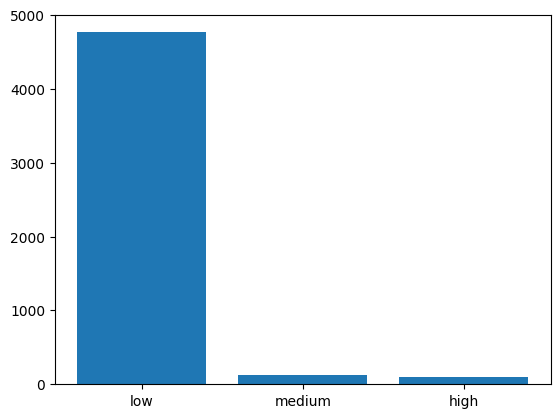

In [273]:
pyplot.bar(groups,df['Cost bins'].value_counts())

In [274]:
df['Retail Price'].describe()

count    4998.000000
mean       38.181885
std        98.836164
min         1.140000
25%         2.940000
50%         5.740000
75%        19.980000
max       599.990000
Name: Retail Price, dtype: float64

In [275]:
bins= np.linspace(min(df['Retail Price']), max(df['Retail Price']), 4)
groups = ['low','medium','high']
df['Retail bins'] = pd.cut(df['Retail Price'], bins, labels=groups, include_lowest=True)
df['Retail bins'].value_counts()

Retail bins
low       4754
high       183
medium      61
Name: count, dtype: int64

<BarContainer object of 3 artists>

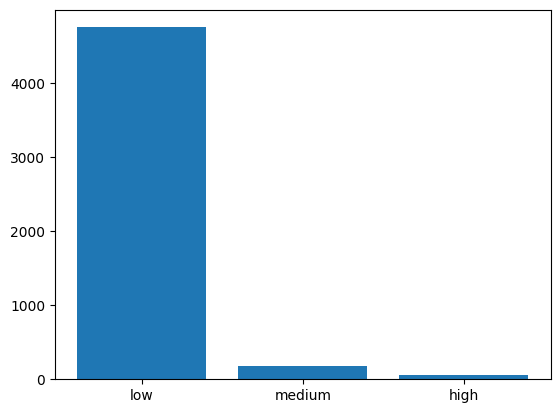

In [276]:
pyplot.bar(groups,df['Retail bins'].value_counts())

In [277]:
bins= np.linspace(min(df['Profit Margin']), max(df['Profit Margin']), 4)
groups = ['low','medium','high']
df['Profit bins'] = pd.cut(df['Profit Margin'], bins, labels=groups, include_lowest=True)
df['Profit bins'].value_counts()

Profit bins
low       4765
medium     227
high         6
Name: count, dtype: int64

<BarContainer object of 3 artists>

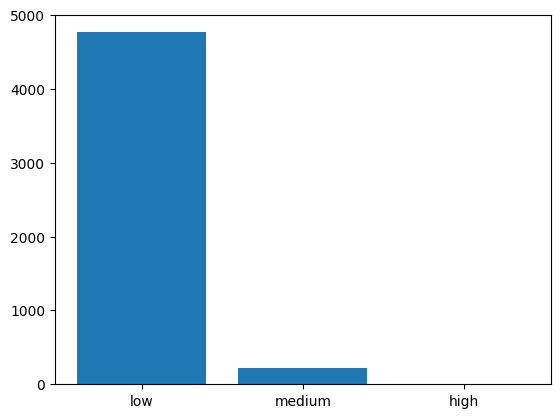

In [278]:
pyplot.bar(groups, df['Profit bins'].value_counts())

In [279]:
df.head()

,Order No,Order Date,Customer Name,Address,City,State,Customer Type,Account Manager,Order Priority,Product Name,Product Category,Product Container,Ship Mode,Ship Date,Cost Price,Retail Price,Profit Margin,Order Quantity,Sub Total,Discount %,Discount $,Order Total,Shipping Cost,Total,Cost bins,Retail bins,Profit bins
0,42931,2014-02-09,Vivek Sundaresam,"152 Bunnerong Road,Eastgardens",Sydney,NSW,Small Business,Tina Carlton,Critical,UGen Ultra Professional Cordless Optical Suite,Office Supplies,Small Box,Regular Air,2014-04-09,156.50,300.97,144.47,23.0,4533.52,2,194.83,4757.22,7.18,4291.55,medium,medium,medium
1,50011,2015-10-24,Shahid Hopkins,"438 Victoria Avenue,Chatswood",Sydney,NSW,Corporate,Natasha Song,Medium,Bagged Rubber Bands,Office Supplies,Small Pack,Regular Air,2015-10-26,0.24,1.26,1.02,8.0,45.20,3,0.00,45.90,0.70,46.91,low,low,low
2,50041,2014-03-13,Dennis Pardue,"412 Brunswick St,Fitzroy",Melbourne,VIC,Consumer,Connor Betts,Not Specified,TechSavi Cordless Navigator Duo,Office Supplies,Small Box,Regular Air,2014-03-13,42.11,80.98,38.87,45.0,873.32,4,72.23,837.57,7.18,82.58,low,low,low
3,50091,2013-02-18,Sean Wendt,"145 Ramsay St,Haberfield",Sydney,NSW,Small Business,Phoebe Gour,Critical,Artisan Printable Repositionable Plastic Tabs,Office Supplies,Wrap Bag,Regular Air,2013-02-20,5.33,8.60,3.27,16.0,73.52,1,4.35,740.67,6.19,730.92,low,low,low
4,50101,2014-09-13,Christina Vanderzanden,"188 Pitt Street,Sydney",Sydney,NSW,Small Business,Tina Carlton,Not Specified,Pizazz Drawing Pencil Set,Office Supplies,Wrap Bag,Express Air,2014-09-17,1.53,2.78,1.25,49.0,138.46,7,5.95,123.77,1.34,125.97,low,low,low


#### So, let's drop the columns which do not contribute in analysis because profit, sales, product and growth matters more
##### Drop - Order No, Customer Name, Address

In [280]:
df = df.drop(columns = ['Order No', 'Customer Name', 'Address'])

#### there are errors in data of prices, so lets recalculate them

In [281]:
df['Sub Total'] = df['Retail Price'] * df['Order Quantity']
df['Discount $'] = df['Sub Total'] * (df['Discount %']/100)
df['Order Total'] = df['Sub Total'] - df['Discount $']
df['Total'] = df['Order Total'] - df['Shipping Cost']

In [282]:
df.head()

,Order Date,City,State,Customer Type,Account Manager,Order Priority,Product Name,Product Category,Product Container,Ship Mode,Ship Date,Cost Price,Retail Price,Profit Margin,Order Quantity,Sub Total,Discount %,Discount $,Order Total,Shipping Cost,Total,Cost bins,Retail bins,Profit bins
0,2014-02-09,Sydney,NSW,Small Business,Tina Carlton,Critical,UGen Ultra Professional Cordless Optical Suite,Office Supplies,Small Box,Regular Air,2014-04-09,156.50,300.97,144.47,23.0,6922.31,2,138.4462,6783.8638,7.18,6776.6838,medium,medium,medium
1,2015-10-24,Sydney,NSW,Corporate,Natasha Song,Medium,Bagged Rubber Bands,Office Supplies,Small Pack,Regular Air,2015-10-26,0.24,1.26,1.02,8.0,10.08,3,0.3024,9.7776,0.70,9.0776,low,low,low
2,2014-03-13,Melbourne,VIC,Consumer,Connor Betts,Not Specified,TechSavi Cordless Navigator Duo,Office Supplies,Small Box,Regular Air,2014-03-13,42.11,80.98,38.87,45.0,3644.10,4,145.7640,3498.3360,7.18,3491.1560,low,low,low
3,2013-02-18,Sydney,NSW,Small Business,Phoebe Gour,Critical,Artisan Printable Repositionable Plastic Tabs,Office Supplies,Wrap Bag,Regular Air,2013-02-20,5.33,8.60,3.27,16.0,137.60,1,1.3760,136.2240,6.19,130.0340,low,low,low
4,2014-09-13,Sydney,NSW,Small Business,Tina Carlton,Not Specified,Pizazz Drawing Pencil Set,Office Supplies,Wrap Bag,Express Air,2014-09-17,1.53,2.78,1.25,49.0,136.22,7,9.5354,126.6846,1.34,125.3446,low,low,low


# EDA

In [283]:
df.describe(include=['int','float'])

,Cost Price,Retail Price,Profit Margin,Order Quantity,Sub Total,Discount %,Discount $,Order Total,Shipping Cost,Total
count,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000
mean,20.326240,38.181885,17.958501,26.478992,1032.035732,5.035014,50.521268,981.514464,5.462023,976.052441
std,56.923641,98.836164,44.617220,14.390376,3077.113790,3.226890,174.320731,2931.944389,7.975835,2926.693573
min,0.240000,1.140000,0.360000,1.000000,1.260000,0.000000,0.000000,1.260000,0.490000,-4.525200
25%,1.840000,2.940000,1.320000,13.000000,64.055000,2.000000,1.730400,61.400800,1.010000,58.879425
50%,3.500000,5.740000,2.330000,27.000000,144.000000,5.000000,6.048000,137.556000,2.850000,134.330800
75%,8.820000,19.980000,8.500000,39.000000,449.990000,8.000000,20.089900,427.992300,6.500000,419.764050
max,377.990000,599.990000,430.180000,50.000000,29999.500000,10.000000,2999.950000,26999.550000,69.300000,26975.060000


#### negative value in min of total col, drop those rows

In [284]:
df = df[df['Total'] >= 0]

In [285]:
df['Total'].describe()

count     4987.000000
mean       978.210064
std       2929.559134
min          0.147600
25%         59.288400
50%        134.957200
75%        423.397900
max      26975.060000
Name: Total, dtype: float64

In [286]:
df.describe(include='object')

,City,State,Customer Type,Account Manager,Order Priority,Product Name,Product Category,Product Container,Ship Mode
count,4987,4987,4987,4987,4987,4987,4987,4987,4987
unique,2,2,4,19,5,257,3,6,3
top,Sydney,NSW,Corporate,Connor Betts,High,Artisan 474 Labels,Office Supplies,Small Box,Regular Air
freq,3575,3575,1819,888,1122,136,3940,2582,4224


### Analyze individual feature patterns with target variable

In [287]:
from scipy import stats

In [288]:
df[['Total','Profit Margin']].corr()

,Total,Profit Margin
Total,1.000000,0.840626
Profit Margin,0.840626,1.000000


In [289]:
coef, p = stats.pearsonr(df['Total'],df['Profit Margin'])
print(coef,p)

0.8406262672653804 0.0


<Axes: xlabel='Profit Margin', ylabel='Total'>

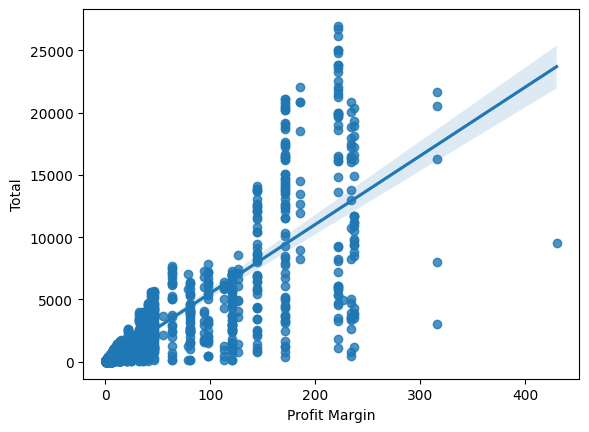

In [290]:
sns.regplot(x='Profit Margin',y='Total',data=df)

#### Profit Margin and Total show 
* strong positive linear correlation and
* strong statistical significance

In [291]:
coef, p = stats.pearsonr(df['Cost Price'], df['Profit Margin'])
print(coef, p)

0.9117282607653232 0.0


<Axes: xlabel='Cost Price', ylabel='Profit Margin'>

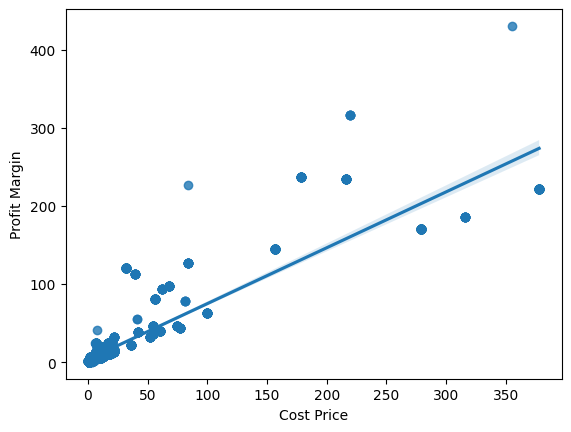

In [292]:
sns.regplot(x='Cost Price',y='Profit Margin',data=df)

In [293]:
coef, p = stats.pearsonr(df['Retail Price'], df['Profit Margin'])
print(coef, p)

0.9684087621351837 0.0


<Axes: xlabel='Retail Price', ylabel='Profit Margin'>

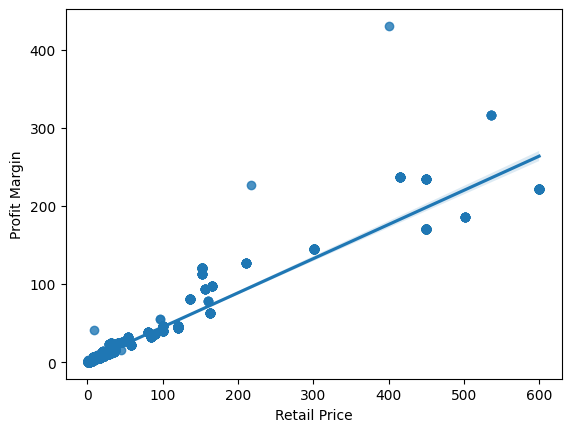

In [294]:
sns.regplot(x='Retail Price',y='Profit Margin',data=df)

In [295]:
coef, p = stats.pearsonr(df['Order Quantity'], df['Profit Margin'])
print(coef, p)

0.012209734831497251 0.3886591691393348


In [296]:
coef, p = stats.pearsonr(df['Discount $'], df['Profit Margin'])
print(coef, p)

0.7011487856301701 0.0


In [297]:
coef, p = stats.pearsonr(df['Total'], df['Profit Margin'])
print(coef, p)

0.8406262672653804 0.0


#### 1. Profit Margin -> Cost Price, Retail Price, Discount $, Total  (Positive linear correlation, statistically significant)
####    ~ Order Quantity

In [298]:
coef, p = stats.pearsonr(df['Cost Price'], df['Total'])
print(coef, p)

0.8567010406948811 0.0


<Axes: xlabel='Cost Price', ylabel='Total'>

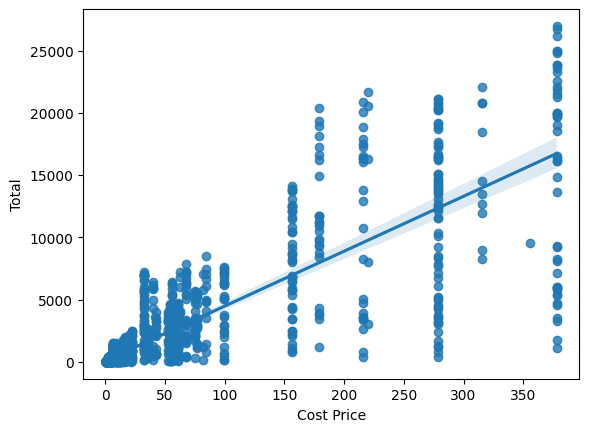

In [299]:
sns.regplot(x='Cost Price',y='Total',data=df)

In [300]:
coef, p = stats.pearsonr(df['Retail Price'], df['Total'])
print(coef, p)

0.8703800026954983 0.0


<Axes: xlabel='Retail Price', ylabel='Total'>

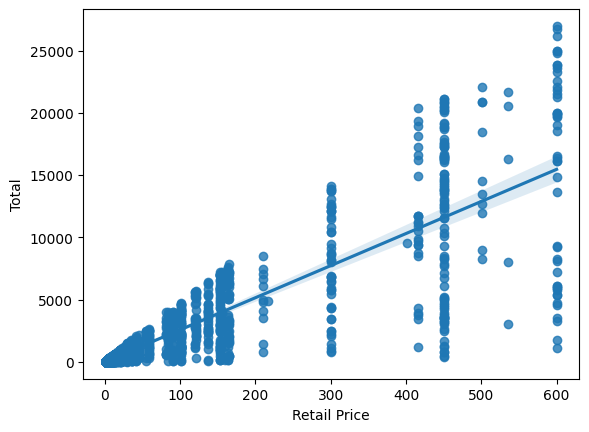

In [301]:
sns.regplot(x='Retail Price',y='Total',data=df)

In [302]:
coef, p = stats.pearsonr(df['Order Quantity'], df['Total'])
print(coef, p)

0.18950474931786157 1.5272854586649375e-41


In [303]:
coef, p = stats.pearsonr(df['Discount $'], df['Total'])
print(coef, p)

0.8236064009799937 0.0


In [304]:
coef, p = stats.pearsonr(df['Shipping Cost'], df['Total'])
print(coef, p)

0.6579102232254438 0.0


#### 2. Total -> Cost Price, Retail Price, Discount $, Shipping Cost (Positive linear correlation, statistically significant)
####     Order Quantity(very weak)

In [305]:
import matplotlib.pyplot as plt
df['Profit log'] = np.log1p(df['Profit Margin'])

In [306]:
avg_profit = df.groupby('Product Category')['Profit Margin'].mean().reset_index()
avg_profit

,Product Category,Profit Margin
0,Furniture,12.767381
1,Office Supplies,17.675289
2,Technology,20.423208


<Axes: xlabel='Product Category', ylabel='Profit Margin'>

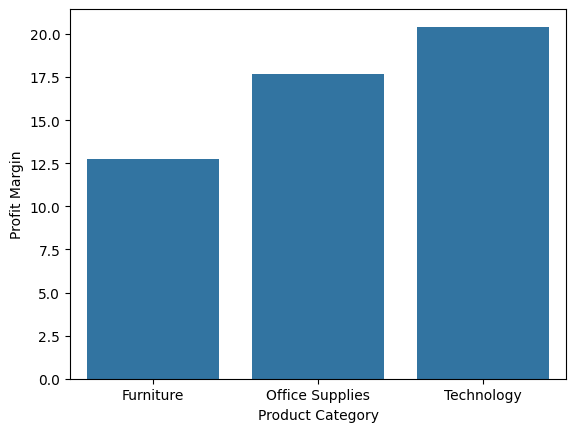

In [307]:
sns.barplot(x='Product Category',y='Profit Margin',data=avg_profit)

#### more profit in technology than other categories

In [308]:
df['total log'] = np.log1p(df['Total'])

In [309]:
avg_sales = df.groupby('Product Category')['Total'].mean().reset_index()
avg_sales

,Product Category,Total
0,Furniture,484.245247
1,Office Supplies,977.103044
2,Technology,1077.581790


<Axes: xlabel='Product Category', ylabel='Total'>

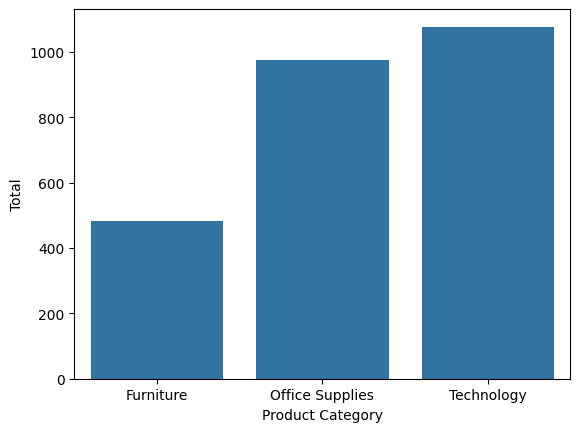

In [310]:
sns.barplot(x='Product Category',y='Total',data=avg_sales)

#### more sales in technology than others

In [311]:
avg_profit_cust = df.groupby('Order Priority')['Total'].mean().reset_index()
avg_profit_cust

,Order Priority,Total
0,Critical,922.579448
1,High,1001.763695
2,Low,1163.783803
3,Medium,1002.799596
4,Not Specified,829.003129


<Axes: xlabel='Order Priority', ylabel='Total'>

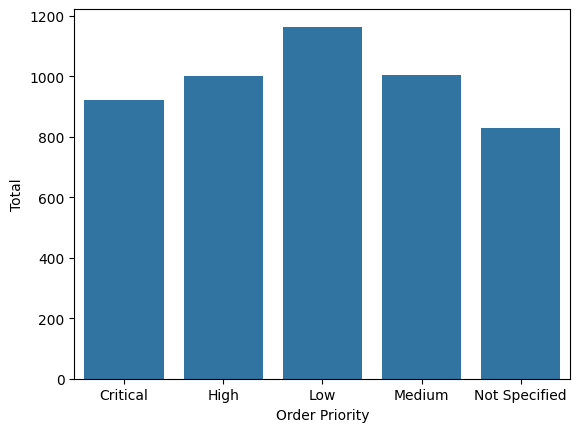

In [312]:
sns.barplot(x='Order Priority',y='Total',data=avg_profit_cust)

#### Most business comes from “Low Priority” orders

In [313]:
city_grp = df.groupby('City')['Total'].sum().reset_index()
city_grp

,City,Total
0,Melbourne,1.427748e+06
1,Sydney,3.450586e+06


<Axes: xlabel='City', ylabel='Total'>

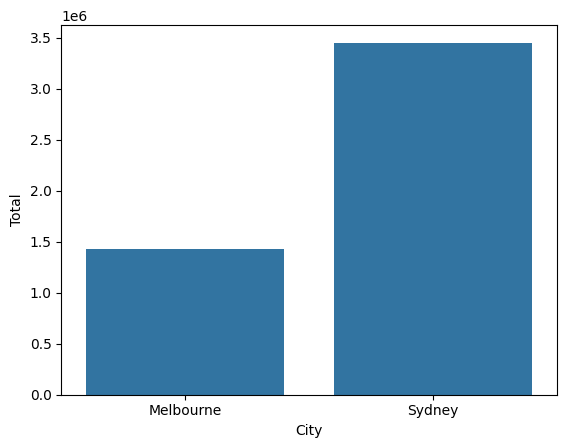

In [314]:
sns.barplot(x='City',y='Total',data=city_grp)

#### more sales from Sydney

In [315]:
cust_grp = df.groupby('Customer Type')['Total'].mean().reset_index()
cust_grp

,Customer Type,Total
0,Consumer,1063.592034
1,Corporate,908.951113
2,Home Office,1041.984130
3,Small Business,954.760350


<Axes: xlabel='Customer Type', ylabel='Total'>

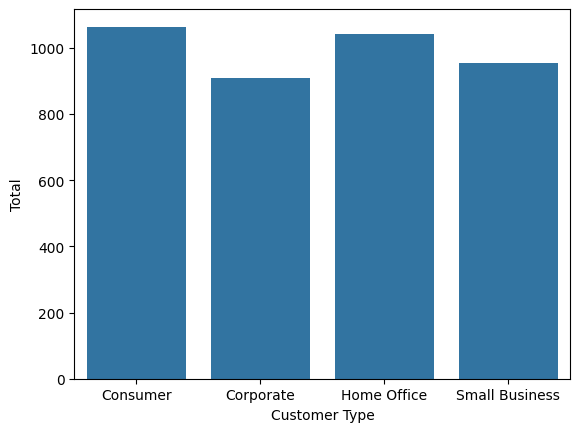

In [316]:
sns.barplot(x='Customer Type',y='Total',data=cust_grp)

In [317]:
df.describe(include='object')

,City,State,Customer Type,Account Manager,Order Priority,Product Name,Product Category,Product Container,Ship Mode
count,4987,4987,4987,4987,4987,4987,4987,4987,4987
unique,2,2,4,19,5,257,3,6,3
top,Sydney,NSW,Corporate,Connor Betts,High,Artisan 474 Labels,Office Supplies,Small Box,Regular Air
freq,3575,3575,1819,888,1122,136,3940,2582,4224


In [318]:
df['Order Priority'].value_counts()

Order Priority
High             1122
Not Specified    1087
Medium           1036
Critical          883
Low               859
Name: count, dtype: int64

In [319]:
df['Ship Mode'].value_counts()

Ship Mode
Regular Air       4224
Express Air        646
Delivery Truck     117
Name: count, dtype: int64

### Groupby and pivot tables

<Axes: xlabel='None-Profit bins', ylabel='Product Category'>

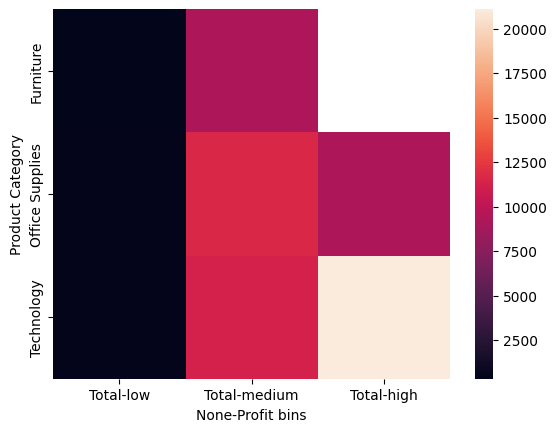

In [320]:
df_group_one = df[['Product Category','Profit bins','Total']]
grouped_one = df_group_one.groupby(['Product Category','Profit bins'], as_index=False,observed=True)['Total'].mean()
grouped_one_pivot = grouped_one.pivot(index='Product Category',columns='Profit bins')
sns.heatmap(grouped_one_pivot)

<Axes: xlabel='None-Profit bins', ylabel='Product Container'>

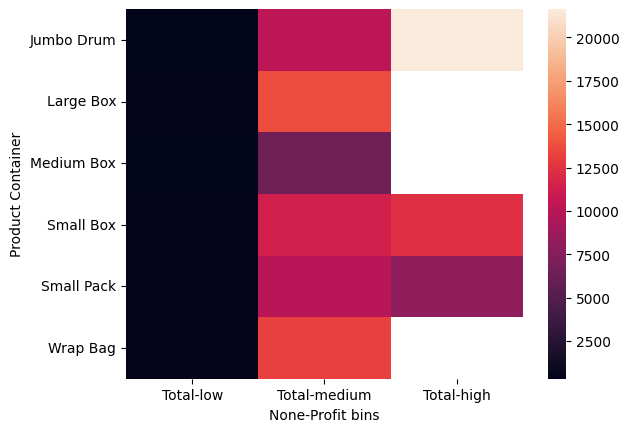

In [321]:
df_group_two = df[['Product Container','Profit bins','Total']]
grouped_two = df_group_two.groupby(['Product Container','Profit bins'], as_index=False, observed=True)['Total'].mean()
grouped_two_pivot = grouped_two.pivot(index='Product Container',columns='Profit bins')
sns.heatmap(grouped_two_pivot)

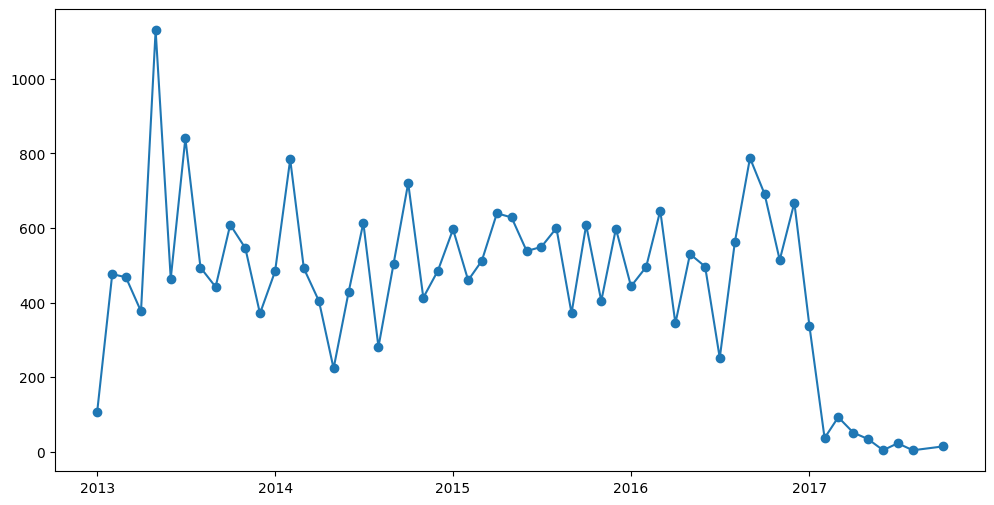

In [322]:
grouped_four = df.groupby([df['Order Date'].dt.to_period('M')])['total log'].sum().reset_index()
grouped_four['Order Date'] = grouped_four['Order Date'].dt.to_timestamp()
plt.figure(figsize=(12,6))
plt.plot(grouped_four['Order Date'], grouped_four['total log'], marker='o')

# Conclusion
* Technology category shows the highest sales and profit compared to Furniture     and Office Supplies.

* Majority of the business is driven by “Low Priority” orders.

* Sales are concentrated more in Sydney compared to other cities.

* Overall sales trend shows growth during 2013–2014, stability from 2014–2017,     and a sharp decline after 2017 (reaching zero due to dataset cutoff)